# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']

In [3]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:200]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 10
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

In [4]:
# 数据standard_normalize
def standard_normalizaion(images):
    num_image = images.shape[1]
    for i in range(num_image):
        mean = np.mean(images[:, i])
        std = np.std(images[:, i])
        images[:, i] = (images[:, i] - mean) / std

In [5]:
# 计算错误率
def cal_error(w, X, y, class1=-1, class2=1):
    middle = (class1 + class2) / 2
    number_of_sample = X.shape[1]
    D = np.vstack((np.ones((1, number_of_sample)), X))
    predict = np.matmul(w.T, D)
    predict = np.where(predict < middle, class1, class2)
    error = np.sum(predict != y)
    return error / number_of_sample

### Ridge Regression and LOOCV

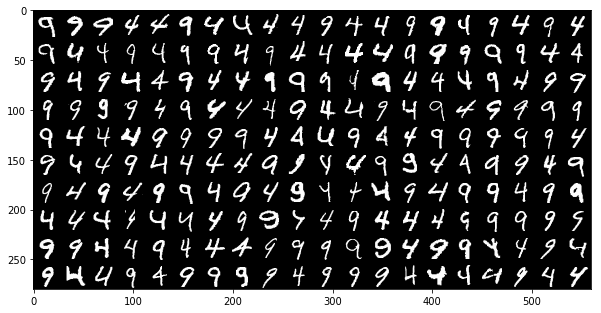

In [6]:
show_digit(X)
# Do feature normalization here
# begin answer
standard_normalizaion(X)
standard_normalizaion(X_test)
# end answer

In [7]:
# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')

from ridge import ridge

for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = X[:, j:j+1]  # take point j out of X
        y_ = y[0, j:j+1]
        w = ridge(np.concatenate((X[:, :j], X[:, j+1:]), axis=1), np.concatenate((y[:, :j],y[:, j+1:]), axis=1), lmbdas[i])
        E_val = E_val + cal_error(w, X_, y_)

    # Update lmbda according validation error
    # begin answer
    if E_val < E_val_min:
        E_val_min = E_val
        lmbda = i
    # end answer
print(lmbda)
# Compute training error
w = ridge(X, y, lmbdas[lmbda])
train_error = cal_error(w, X, y)
# Compute test error
test_error = cal_error(w, X_test, y_test)
print(train_error, test_error)


6
0.0 0.065796082370668


In [8]:
print(np.sum(np.square(w)))

0.1630285235645602


In [9]:
# 不使用regularization
w = ridge(X, y, 0)
train_error = cal_error(w, X, y)
# Compute test error
test_error = cal_error(w, X_test, y_test)
print(train_error, test_error)
print(np.sum(np.square(w)))

0.0 0.11049723756906077
1.4233012452689249


### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

In [16]:
from logistic_r import logistic_r

lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')

y[ y == -1 ] = 0
y_test[ y_test == -1 ] = 0
for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        X_ = X[:, j:j+1]  # take point j out of X
        y_ = y[0, j:j+1]
        w = logistic_r(np.concatenate((X[:, :j], X[:, j+1:]), axis=1), np.concatenate((y[:, :j],y[:, j+1:]), axis=1), lmbdas[i])
        E_val = E_val + cal_error(w, X_, y_, 0, 1)
        
    # Update lmbda according validation error
    # begin answer
    if E_val < E_val_min:
        E_val_min = E_val
        lmbda = i
    # end answer
    
print(lmbda)
# Compute training error
w = logistic_r(X, y, lmbdas[lmbda])
train_error = cal_error(w, X, y, 0, 1)
# Compute test error
test_error = cal_error(w, X_test, y_test, 0, 1)
print(train_error, test_error)

C:\Users\DELL\Desktop\course\数据挖掘\code\hw2\regularization-cross-validation\logistic_r.py:27: RuntimeWarning: overflow encountered in multiply
  delta = np.sum(delta, axis=1).reshape((-1, 1)) + 2 * lmbda * np.abs(w)
C:\Users\DELL\Desktop\course\数据挖掘\code\hw2\regularization-cross-validation\logistic_r.py:22: RuntimeWarning: invalid value encountered in matmul
  exp = np.exp(np.matmul(w.T, D))
D:\conda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


0
0.0 0.057759919638372674


In [17]:
print(np.sum(np.square(w)))

10.927349717740054


In [15]:
# 不使用regularization
w = logistic_r(X, y, 0)
train_error = cal_error(w, X, y, 0, 1)
# Compute test error
test_error = cal_error(w, X_test, y_test, 0, 1)
print(train_error, test_error)
print(np.sum(np.square(w)))

0.0 0.057759919638372674
10.931029261740523
